In [77]:
import numpy as np
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
print("The dataset has the lenght of: ", len(x))

The dataset has the lenght of:  100


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

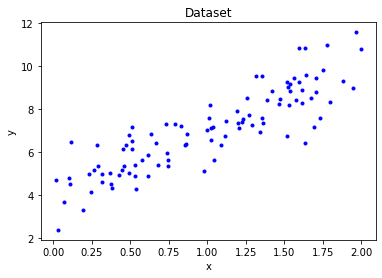

In [79]:
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset')
plt.show()

In [80]:
import pandas as pd

In [81]:
data = {"Amount_damaged_equipment": x.flatten(), "Cost": y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,Amount_damaged_equipment,Cost
0,1.707042,8.794146
1,0.572420,5.618163
2,1.618168,8.909057
3,0.994683,7.032610
4,0.631837,6.862828
5,1.631947,6.429977
6,1.359035,7.363434
7,1.343280,6.925530
8,0.976653,5.095772
9,0.858121,6.375315


In [82]:
#Scalling up the data of affected equipment 
df["Amount_damaged_equipment"] = df["Amount_damaged_equipment"] * 1000
df["Amount_damaged_equipment"] = df["Amount_damaged_equipment"].astype(int)
#Scalling up the data of cost
df["Cost"] = df["Cost"] * 10000
df["Cost"] = df["Cost"].astype(int)
df.head(10)


,Amount_damaged_equipment,Cost
0,1707,87941
1,572,56181
2,1618,89090
3,994,70326
4,631,68628
5,1631,64299
6,1359,73634
7,1343,69255
8,976,50957
9,858,63753


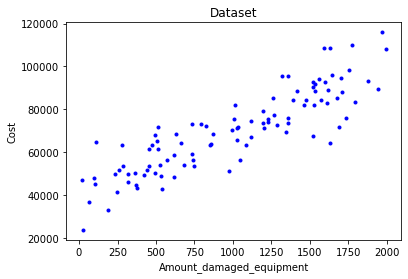

In [83]:
plt.plot(df["Amount_damaged_equipment"], df["Cost"], 'b.')
plt.xlabel('Amount_damaged_equipment')
plt.ylabel('Cost')
plt.title('Dataset')
plt.show()

In [84]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#Fitting the data to the model
#Model gets the input and output parameters
#Model predicts the output based on the input
lin_reg.fit(df['Amount_damaged_equipment'].values.reshape(-1, 1), df['Cost'].values)

LinearRegression()

In [85]:
#parameter of theta 0 and theta 1 respectivly
print("Theta 0: ", lin_reg.intercept_)
print("Theta 1: ", lin_reg.coef_)

Theta 0:  40435.55777350202
Theta 1:  [29.77818783]


In [86]:
#prediction for the minimum and max value of the dataset of the amount of data during the training
print("The minimum value of the dataset: ", df['Amount_damaged_equipment'].min())
print("The maximum value of the dataset: ", df['Amount_damaged_equipment'].max())
#fit those values into an array
x_minimun_maximun = np.array([df['Amount_damaged_equipment'].min(), df['Amount_damaged_equipment'].max()])
print(x_minimun_maximun)
y_train_pred = lin_reg.predict(x_minimun_maximun.reshape(-1, 1))

The minimum value of the dataset:  17
The maximum value of the dataset:  1995
[  17 1995]


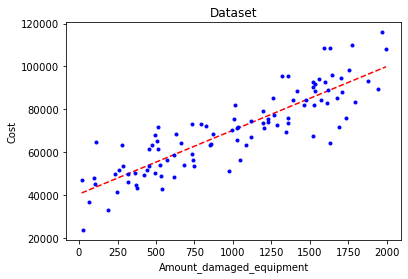

In [87]:
plt.plot(x_minimun_maximun, y_train_pred, 'r--')
plt.plot(df['Amount_damaged_equipment'], df['Cost'], 'b.')
plt.xlabel('Amount_damaged_equipment')
plt.ylabel('Cost')
plt.title('Dataset')
plt.show()
#prediction for the minimum and max value of the dataset of the amount of data during the training
#red line is the prediction of the model
#blue dots are the actual data

In [88]:
x_new = np.array([[1200]])
#prediction of the cost of the equipment
damage_cost = lin_reg.predict(x_new)
#print("The cost of the equipment is: ", damage_cost, "$")
#print("The cost of the equipment is: ", int(damage_cost)[0], "$")
print("The cost of the equipment is: ", int(damage_cost), "$")


The cost of the equipment is:  76169 $
